In [1]:
import numpy as np
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)
x.grad

In [3]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [4]:
y = 2*torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

In [7]:
# 在默认情况下，Pytorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [8]:
x.grad.zero_()
y = x * x
y.sum().backward()

x.grad

tensor([0., 2., 4., 6.])

In [25]:
x.grad.zero_()
y = x * x
y.backward(torch.ones(len(x)))

x.grad

tensor([0., 2., 4., 6.])

In [10]:
x.grad.zero_()
y = x * x
u = y.detach()

In [11]:
u.requires_grad

False

In [12]:
y

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [24]:
z = u * x
z.sum().backward()
x.grad

tensor([ 0.,  4., 12., 24.])

In [14]:
u

tensor([0., 1., 4., 9.])

In [15]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [16]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [47]:
a = torch.randn(size=(2, 1), requires_grad=True)
d = f(a)
d.sum().backward()

In [49]:
a.grad == d / a

tensor([[True],
        [True]])

In [37]:
import numpy as np
x = torch.arange(5, requires_grad=True, dtype=torch.float32)

In [43]:
y = x * x
y.sum().backward()
x.grad

tensor([ 0., 12., 24., 36., 48.])

In [33]:
x.grad

tensor([0., 2., 4., 6., 8.])

In [34]:
y.sum().backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

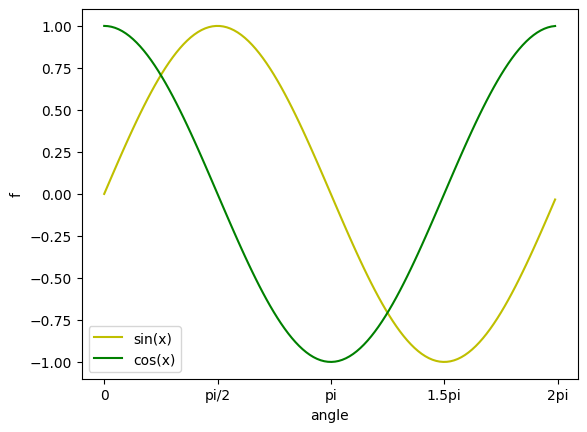

In [78]:
import matplotlib.pyplot as plt
import math
x = np.arange(0, math.pi*2, 0.05)
x_ = torch.tensor(x, dtype=torch.float32, requires_grad=True)
y = torch.sin(x_)
y_hat = y.sum().backward()
plt.plot(x, np.sin(x), 'y', label='sin(x)')
plt.plot(x, x_.grad, 'g', label='cos(x)')
plt.xlabel('angle')
plt.ylabel('f')
plt.xticks([0, math.pi*0.5, math.pi*1, math.pi*1.5, math.pi*2], ['0', 'pi/2', 'pi', '1.5pi', '2pi'])
plt.legend()
plt.show()

In [52]:
x

tensor([0., 1., 2., 3., 4., 5., 6.], requires_grad=True)

In [64]:
x.detach().numpy()

array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)

In [62]:
math.sin(x_)

TypeError: only size-1 arrays can be converted to Python scalars

In [63]:
math.sin()

TypeError: must be real number, not list

In [65]:
torch.sin()

array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)